# Digit Recognizer

###### CNN on classic dataset of handwritten images

### Importing important libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

### Reading Datasets

##### Train Dataset

In [2]:
train = pd.read_csv("train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


##### Test Dataset

In [4]:
test = pd.read_csv("test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


### Exploratory Data Analsysis

#### Checking for NULL values

In [6]:
train.melt(id_vars="label")['value'].isnull().sum()

0

In [7]:
test.melt()['value'].isnull().sum()

0

#### Count of each labels

In [8]:
train['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

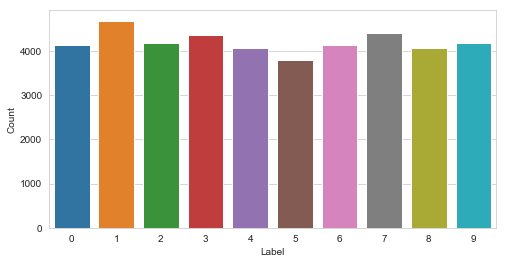

In [9]:
# Plot
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
sns.countplot(x="label", data=train)
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

#### Dividing the training dataset into X and y

In [10]:
y = train['label']
X = train.drop(['label'], axis = 1)

#### Normalize the pixel data, i.e. converting values from 0 - 254 to 0 - 1 

In [11]:
X = X / 255
test = test / 255

#### Converting labels to numpy array

In [12]:
y = np.array(y)

#### Reshaping image to 28px X 28px dimension

In [13]:
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

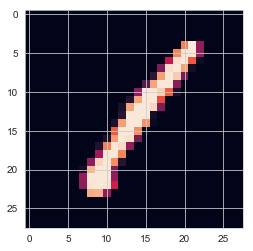

In [14]:
plt.imshow(X[0][:,:,0])

### Modelling CNN

#### Creating train and test datasets

In [15]:
random_seed = 4

In [16]:
# Split the train and test set for the fitting
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.1, random_state=random_seed)

### Tensorflow Model

In [17]:
# Tensorflow Keras CNN Model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape = train_X.shape[1:]))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(128, (3,3), padding = "same", activation = "relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


Instructions for updating:
Colocations handled automatically by placer.


#### Optimizer and loss function

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
__________

#### Fitting the train dataset

In [20]:
model.fit(train_X, train_y, epochs=3)

Epoch 1/3
37800/37800 [==============================] - 61s 2ms/sample - loss: 0.1727 - acc: 0.9478
Epoch 2/3
37800/37800 [==============================] - 63s 2ms/sample - loss: 0.0467 - acc: 0.9856
Epoch 3/3
37800/37800 [==============================] - 67s 2ms/sample - loss: 0.0319 - acc: 0.9900


#### Finding the loss and accuracy of the model

In [21]:
val_loss, val_acc = model.evaluate(test_X, test_y) 

4200/4200 [==============================] - 2s 424us/sample - loss: 0.0437 - acc: 0.9848


In [22]:
val_acc

0.9847619

### Predicting the submission dataframe

#### Fitting the full train data

In [23]:
model.fit(X, y, epochs=3)

Epoch 1/3
42000/42000 [==============================] - 74s 2ms/sample - loss: 0.0262 - acc: 0.9916
Epoch 2/3
42000/42000 [==============================] - 74s 2ms/sample - loss: 0.0199 - acc: 0.9939
Epoch 3/3
42000/42000 [==============================] - 131s 3ms/sample - loss: 0.0153 - acc: 0.9953


#### Predicting on given test data

In [24]:
test_pred = model.predict(test)

In [25]:
submission = pd.DataFrame()
submission['ImageId'] = range(1, (len(test)+1))
submission['Label'] = np.argmax(test_pred, axis=1)

In [26]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [27]:
submission.shape

(28000, 2)

#### Saving in a csv file

In [28]:
submission.to_csv("submission.csv", index=False)

### Score of 0.98900 on kaggle